In [10]:
!nvidia-smi

Fri Nov 15 07:07:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0              28W /  70W |    227MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision import models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:
model_path = '/content/age_detectioon_model.pkl'  # Replace with the actual path to your saved .pkl file
with open(model_path, 'rb') as f:
    model = pickle.load(f)

model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Match input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # ImageNet stats
])

In [ ]:
img_path = '/content/9_0_0_20170102235106821.jpg.chip.jpg'
image = Image.open(img_path)

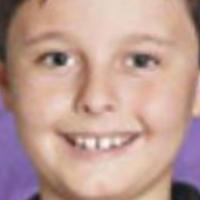

In [ ]:
image


In [ ]:
# Apply transformations to the image
image = transform(image).unsqueeze(0)  # Add batch dimension

# Move the image and model to the check device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
image = image.to(device)
model = model.to(device)

In [ ]:
# Make the prediction 
with torch.no_grad():
    output = model(image)

    
    predicted_age = output.item()

In [12]:
print(f'Predicted age: {predicted_age}')

Predicted age: 11.020755767822266


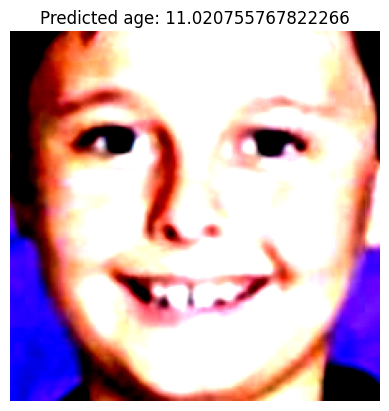

In [13]:
plt.imshow(image.squeeze(0).permute(1, 2, 0).cpu())
plt.title(f'Predicted age: {predicted_age}')
plt.axis('off')
plt.show()